README

The only depedencies that are required are the following libraries: NumPy, Matplotlib, and Pandas.

The notebook needs the following files to run: x_train.npy, y_train.npy, x_test.npy, y_test.npy, and Housing_data_regression.xlsx.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
  def __init__(self, data_matrix, theta, learning_rate = 0):
    self.data_matrix = data_matrix
    self.num_examples = np.shape(data_matrix)[0]
    self.residuals_vector = np.zeros(self.num_examples)
    self.theta = theta
    self.learning_rate = learning_rate
    self.W = np.zeros((self.num_examples, self.num_examples))

  # Returns prediction when given feature vector
  # Updates residuals vector across examples
  def lr_prediction(self, feature_vector, target_value, example_number):
    prediction = np.dot(self.theta, feature_vector)
    self.residuals_vector[example_number] = target_value - prediction
    return prediction

  # Finds Mean Squared Error
  def lr_mean_squared_error(self):
    return np.sum(np.square(self.residuals_vector)) / self.num_examples

  # Find weights for locally weighted linear regression
  def find_weights_lw_lr(self, query_features, bandwidth_parameter):
    for i in range(self.num_examples):
      training_vector = self.data_matrix[i, :-1]
      distance = np.linalg.norm(training_vector - query_features)
      W_i = np.exp((-1 * np.square(distance)) / (2 * np.square(bandwidth_parameter)))
      self.W[i][i] = W_i

  # Gradient Descent Function for Linear Regression
  def lr_gradient_descent(self, epochs):

    for i in range(epochs):

      # Shuffle my data for each epoch
      np.random.shuffle(self.data_matrix)

      # Find residuals for each example
      for j in range(self.num_examples):
        self.lr_prediction(self.data_matrix[j, :-1], self.data_matrix[j, -1], j)

      # Derivative of the loss function with respect to theta
      derivative_vector = np.dot(self.residuals_vector, self.data_matrix[:, :-1])

      # Divide by number of examples and Multiply by Learning Rate
      update = derivative_vector * ((2 / self.num_examples) * self.learning_rate)

      # Update theta parameters
      self.theta = np.add(self.theta, update)


  # Gradient Descent Function for Locally Weighted Linear Regression
  def lw_lr_gradient_descent(self, query_features, epochs, bandwidth_parameter):

    # Find weights for each training example
    self.find_weights_lw_lr(query_features, bandwidth_parameter)

    for i in range(epochs):

      # Find residuals for each example
      for j in range(self.num_examples):
        self.lr_prediction(self.data_matrix[j, :-1], self.data_matrix[j, -1], j)

      # Derivative of the loss function with respect to theta
      derivative_vector = np.dot(np.dot(self.data_matrix[:, :-1].T, self.W), self.residuals_vector)

      # Divide by number of examples and Multiply by Learning Rate
      update = derivative_vector * ((2 / self.num_examples) * self.learning_rate)

      # Update theta Parameters
      self.theta = np.add(self.theta, update)

  # Normal Equations Function for Locally Weighted Linear Regression
  def lr_normal_quations(self):

    A = np.dot(self.data_matrix[:, :-1].T, self.data_matrix[:, :-1])

    # Find determinant to check if A has an inverse
    determinant = np.linalg.det(A)

    if determinant != 0:
      A_inv = np.linalg.inv(A)
      B = np.dot(A_inv, self.data_matrix[:, :-1].T)
      self.theta = np.dot(B, self.data_matrix[:, -1])

    else:
      print("Matrix is singular, cannot find theta.")


  # Normal Equations Function for Locally Weighted Linear Regression
  def lw_lr_normal_quations(self, query_features, bandwidth_parameter):

    # Find weights for each training example
    self.find_weights_lw_lr(query_features, bandwidth_parameter)

    A = np.dot(np.dot(self.data_matrix[:, :-1].T, self.W), self.data_matrix[:, :-1])

    # Find determinant to check if A has an inverse
    determinant = np.linalg.det(A)

    if determinant != 0:
      A_inv = np.linalg.inv(A)
      B = np.dot(A_inv, self.data_matrix[:, :-1].T)
      C = np.dot(B, self.W)
      self.theta = np.dot(C, self.data_matrix[:, -1])

    else:
      print("Matrix is singular, cannot find theta.")




MSE for Training Data
190.14893280390493


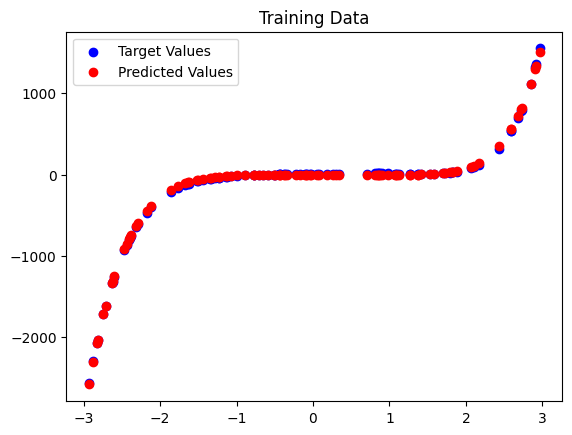

Theta Parameters
[-0.17273994  0.76022019 -0.93693978  1.63100159 -4.50861899  1.69309372
 -0.41927821  0.84704868]


In [ ]:
# Problem 1 Training

# Retrieve data from training files
x_train_data = np.load("x_train.npy")
y_train_data = np.load("y_train.npy")

# Number of Examples in Training
num_examples_training = np.size(x_train_data)

# Using a Polynomial Basis Function of Degree 7 for a 1-d feature vector
# Weight vector need to be of size 8
# Initializing Random Weights
theta = np.random.randn(8)

# Initialize Learning Rate
learning_rate = .0000025

# Keeps track of all of the features and target values across examples
data_matrix_training = np.zeros((num_examples_training, np.size(theta) + 1))

# Creates Features through Polynomial Basis Functions for Training
for i in range(num_examples_training):
  feature_vector = np.zeros(np.size(theta))
  for j in range(np.size(theta)):
    feature_vector[j] = np.power(x_train_data[i], j)
  data_matrix_training[i, :-1] = feature_vector

# Set the last column in my data matrix to the target values for each example
data_matrix_training[:, -1] = y_train_data

# Plot training data to see relationship
plt.title("Training Data")
plt.scatter(x_train_data, y_train_data, color = "blue", label = "Target Values")

# Create Linear Regression Object to conduct Linear Regression for Training
LR_obj_training = Linear_Regression(data_matrix_training, theta, learning_rate)

# Training
LR_obj_training.lr_gradient_descent(10000)

# Initialize Predictor Vector for Training
y_predictions_training = np.zeros(num_examples_training)

for i in range(num_examples_training):
  prediction = LR_obj_training.lr_prediction(data_matrix_training[i, :-1], data_matrix_training[i, -1], i)
  y_predictions_training[i] = prediction

# Find MSE in Training
# Plot Predictions
print("MSE for Training Data")
print(LR_obj_training.lr_mean_squared_error())
plt.scatter(data_matrix_training[:, 1], y_predictions_training, color = "red", label = "Predicted Values")
plt.legend()
plt.show()

# Print theta
print("Theta Parameters")
print(LR_obj_training.theta)


In [ ]:
# Problem 1 Testing

# Retrieve data from testing files
x_test_data = np.load("x_test.npy")
y_test_data = np.load("y_test.npy")

# Number of Examples in Testing
num_examples_testing = np.size(x_test_data)

# Keeps track of all of the features and target values across examples
data_matrix_testing = np.zeros((num_examples_testing, np.size(LR_obj_training.theta) + 1))

# Creates Features through Polynomial Basis Functions for Testing
for i in range(num_examples_testing):
  feature_vector = np.zeros(np.size(LR_obj_training.theta))
  for j in range(np.size(theta)):
    feature_vector[j] = np.power(x_test_data[i], j)
  data_matrix_testing[i, :-1] = feature_vector

# Set the last column in my data matrix to the target values for each example
data_matrix_testing[:, -1] = y_test_data

# Create Linear Regression Object to conduct Linear Regression for Testing
LR_obj_testing = Linear_Regression(data_matrix_testing, LR_obj_training.theta)

# Initialize Predictor Vector for Testing
y_predictions_testing = np.zeros(num_examples_testing)

for i in range(num_examples_testing):
  prediction = LR_obj_testing.lr_prediction(data_matrix_testing[i, :-1], data_matrix_testing[i, -1], i)
  y_predictions_testing[i] = prediction

# Find MSE in Testing
print("MSE for Testing Data")
print(LR_obj_testing.lr_mean_squared_error())



MSE for Testing Data
77.08701696486905


In [ ]:
# Problem 2 Training With all Features
import pandas as pd

# Read data from excel sheet
df = pd.read_excel("Housing_data_regression.xlsx")

# Convert data into Numpy Matrix
data = df.values

# Create and populate data matrix
data_matrix_training = np.zeros((np.shape(data)[0], np.shape(data)[1] + 1))
data_matrix_training[:, :-2] = data[:, :-1]
data_matrix_training[:, -2] = 1
data_matrix_training[:, -1] = data[:, -1]

# Initializing Random Weights
# Vector has length of the features plus 1
theta = np.random.randn(np.shape(data_matrix_training)[1] - 1)

# Initialize Learning Rate
learning_rate = .000575

# Create Linear Regression Object to conduct Linear Regression for Training
LR_obj_training = Linear_Regression(data_matrix_training, theta, learning_rate)

# Training
LR_obj_training.lr_gradient_descent(10000)

# Find MSE in Training
print("MSE for Training Data")
print(LR_obj_training.lr_mean_squared_error())

# Print Weight Vector
print("Theta Parameters")
print(LR_obj_training.theta)




MSE for Training Data
6730630576.291383
Theta Parameters
[   548.44818547 141917.48180335   9630.09068674 198100.31521405
  44304.73665164  71253.16182289 -45574.45729358  -4324.29087868
 -62124.84955467]


In [ ]:
# Problem 2 Training with only the feature with the most effect

# Using only Fourth Feature(Living Area) to Train
# Fourth Feature's corresponding weight parameter has the largest magnitude

# Creating data matrix for one feature
data_matrix_one_feature = np.zeros((np.shape(data_matrix_training)[0], 3))
data_matrix_one_feature[:, 0] = data_matrix_training[:, 3]
data_matrix_one_feature[:, 1] = 1
data_matrix_one_feature[:, 2] = data_matrix_training[:, -1]

# Initializing Random Weights
theta = np.random.randn(2)

# Initialize Learning Rate
learning_rate = .25

# Create Linear Regression Object to conduct Linear Regression for Training
LR_obj_training_one_feature = Linear_Regression(data_matrix_one_feature, theta, learning_rate)

# Training
LR_obj_training_one_feature.lr_gradient_descent(10000)

# Find MSE in Training
print("MSE for Training Data")
print(LR_obj_training_one_feature.lr_mean_squared_error())

# Print Weight Vector
print("Theta Parameters")
print(LR_obj_training_one_feature.theta)

MSE for Training Data
12282616798.30218
Theta Parameters
[478405.49782438 -27219.37595541]


In [ ]:
# Problem 2 Using all the features except the feature with the least effect

# Using all features except for the first feature(House ID)
# Creating data matrix
data_matrix_less_one = np.zeros((np.shape(data_matrix_training)[0], 9))
data_matrix_less_one = data_matrix_training[:, 1:]

# Initializing Random Weights
theta = np.random.randn(8)

# Initialize Learning Rate
learning_rate = .0006

# Create Linear Regression Object to conduct Linear Regression for Training
LR_obj_training_less_one = Linear_Regression(data_matrix_less_one, theta, learning_rate)

# Training
LR_obj_training_less_one.lr_gradient_descent(10000)

# Find MSE in Training
print("MSE for Training Data")
print(LR_obj_training_less_one.lr_mean_squared_error())

# Print Weight Vector
print("Theta Parameters")
print(LR_obj_training_less_one.theta)


MSE for Training Data
6621365486.993344
Theta Parameters
[144250.04211364  10317.62713278 202475.77941896  44370.42065489
  70279.03528069 -46749.48198005  -4205.10393138 -64770.73974029]


In [ ]:
# Problem 3
# Using Locally Weighted Linear Regression to predict Test Data from Problem 1

# Retrieve data from training files
x_train_data = np.load("x_train.npy")
y_train_data = np.load("y_train.npy")

# Number of Examples
num_examples_training = np.size(x_train_data)

# Bandwidth Parameter
bandwidth_parameter = .05

# Keeps track of all of the features and target values across examples
data_matrix_training = np.zeros((num_examples_training, 3))

# Creates and Populates Data Matrix for Training
data_matrix_training[:, 0] = x_train_data
data_matrix_training[:, 1] = 1
data_matrix_training[:, 2] = y_train_data

# Retrieve data from testing files
x_test_data = np.load("x_test.npy")
y_test_data = np.load("y_test.npy")

# Number of Examples
num_examples_testing = np.size(x_test_data)

mse = 0
predictions = np.zeros(num_examples_testing)

# Finds theta using Normal Equations
# Find squared residuals for testing examples
for i in range(num_examples_testing):
  theta = np.random.randn(2)
  LR_obj_lw = Linear_Regression(data_matrix_training, theta)

  query_features = np.array([x_test_data[i], 1])

  LR_obj_lw.lw_lr_normal_quations(query_features, bandwidth_parameter)
  prediction = np.dot(LR_obj_lw.theta, query_features)

  predictions[i] = prediction

  mse += np.square(prediction - y_test_data[i])

print("MSE for Test Data")
print(mse)



MSE for Test Data
0.6332295851203943


**Report**

**Problem 1**

I implemented linear regression for problem 1 by using a class structure. Where the class has instance variables such as a data matrix that contains all the features and target values across examples, the learning rate, and theta vector. The class also has the necessary functions to execute linear regression both through gradient descent and normal equations. The gradient descent implementation can be explained by two main functions. The first function I created called lr_prediction which basically takes the dot product between a feature vector for a example and the theta vector to find the predicted value. It also subtracts our prediction value from our target value to find our residual for that example. Then the function updates our residual vector. The residual vector keeps track of all the residuals across examples for a epoch. The second main function which is called lr_gradient_descent finds the gradient of the loss function with respect to theta using the residual vector the feature matrix of our examples. It then uses this gradient to find our update to our paramters by using the input learning rate.

When I first plotted the training data, I initally though the data was non-linear and followed a cubic trend. So I used a 3rd degree basis function however the best mean squared error I could derive from this approach was 18317. Then I started experimenting with higher order polynomials and I landed on using a 7th degree polynomial. I was able to get a mean squared error of approximately 190 for my training data. The scatter plot of the predictions my model had on the training data vs the actual target values of the training data is shown on the output of the second code block. The final equation I derived is approximately y = 0.85x^7 - 0.42x^6 + 1.69x^5 - 4.51x^4 + 1.63x^3 - 0.94x^2 + 0.76x - 0.17. I then tested my model on the training data and I was able to get a mean squared error of approximately 77.


**Problem 2**

Question 1

The average least squares error using a simple linear regression model was 6730630576.

Question 2

The factor that has the most effect on the final value is Living Area. The corresponding theta parameter to this had a magnitude of 198100 which was the largest out of all the feature variables. I could not use only this feature to predict the housing price. When using all the features I got a MSE of 6730630576, when using only the feature with the most effect I got a MSE of 12282616798.

Question 3

The factor that has the least effect on the final value is the first parameter which is House ID. This feature's corresponding theta parameter had a magnitude of 548. The MSE when we remove this feature improves a substantial amount. MSE with this feature is 6730630576 and the MSE without this feature is 6621365486.


**Problem 3**

Question 1

I do not need any basis function when using the locally weighted approach. Without basis functions I was able to get a MSE of approximately 0.63 for the testing data which is very low.

Question 2

The difference with this implementation compared to the one for problem 1 was that in this implementation we are finding the optimal theta vector for each example in our testing data.
In regular linear regression, we find the optimal theta vector across examples in our training set. In locally weighted linear regression, the way we find the optimal theta vector for a query point in our testing set is to assign weights to each of the points in our training data, where the training points closer to our query point have a larger weight. I was not able to get good results using the gradient descent approach for locally weighted linear regression as I had trouble finding the right learning rate and epoch value. I used a normal equations approach which I was able to get a MSE of approximatley 0.63 which was better than my linear regression approach with basis functions where I had a MSE of approximately 77.09.

